In [6]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats=np.random.uniform(-90,90,size=1500)
lngs=np.random.uniform(-180,180,size=1500)
lat_lngs=zip(lats,lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates=list(lat_lngs)

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d585405145fe20ac8f4a8b10a20b4c9c


In [13]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count +=1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count +=1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | te anau
Processing Record 2 of Set 13 | coquimbo
Processing Record 3 of Set 13 | hermanus
Processing Record 4 of Set 13 | korem
Processing Record 5 of Set 13 | vila
Processing Record 6 of Set 13 | atuona
Processing Record 7 of Set 13 | halalo
City not found. Skipping...
Processing Record 8 of Set 13 | point pedro
Processing Record 9 of Set 13 | sept-iles
Processing Record 10 of Set 13 | jardim
Processing Record 11 of Set 13 | kaitangata
Processing Record 12 of Set 13 | dalvik
Processing Record 13 of Set 13 | busselton
Processing Record 14 of Set 13 | laguna
Processing Record 15 of Set 13 | ushuaia
Processing Record 16 of Set 13 | georgetown
Processing Record 17 of Set 13 | cayenne
Processing Record 18 of Set 13 | sibu
Processing Record 19 of Set 13 | new norfolk
Processing Record 20 of Set 13 | bilibino
Processing Record 21 of Set 13 | kuopio
Processing Record 22 of Set 13 | vila franca do campo

Processing Record 36 of Set 16 | cherskiy
Processing Record 37 of Set 16 | guerrero negro
Processing Record 38 of Set 16 | lircay
Processing Record 39 of Set 16 | puerto ayora
Processing Record 40 of Set 16 | gigmoto
Processing Record 41 of Set 16 | kahului
Processing Record 42 of Set 16 | goianesia
Processing Record 43 of Set 16 | nanakuli
Processing Record 44 of Set 16 | karmana
City not found. Skipping...
Processing Record 45 of Set 16 | shakawe
Processing Record 46 of Set 16 | pilar
Processing Record 47 of Set 16 | birjand
Processing Record 48 of Set 16 | nkongsamba
Processing Record 49 of Set 16 | carroll
Processing Record 50 of Set 16 | baruun-urt
Processing Record 1 of Set 17 | chuy
Processing Record 2 of Set 17 | phuntsholing
Processing Record 3 of Set 17 | grand river south east
City not found. Skipping...
Processing Record 4 of Set 17 | clyde river
Processing Record 5 of Set 17 | shimoda
Processing Record 6 of Set 17 | kanye
Processing Record 7 of Set 17 | pocatello
Processin

Processing Record 23 of Set 20 | roebourne
Processing Record 24 of Set 20 | bowen
Processing Record 25 of Set 20 | verkhnetulomskiy
Processing Record 26 of Set 20 | san vicente
Processing Record 27 of Set 20 | sri aman
Processing Record 28 of Set 20 | hope
Processing Record 29 of Set 20 | broome
Processing Record 30 of Set 20 | ayios kirikos
City not found. Skipping...
Processing Record 31 of Set 20 | ushtobe
Processing Record 32 of Set 20 | along
Processing Record 33 of Set 20 | ambon
Processing Record 34 of Set 20 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 35 of Set 20 | valkeakoski
Processing Record 36 of Set 20 | labuhan
Processing Record 37 of Set 20 | salinas
Processing Record 38 of Set 20 | quang ngai
Processing Record 39 of Set 20 | hamilton
Processing Record 40 of Set 20 | margate
Processing Record 41 of Set 20 | yelanskiy
Processing Record 42 of Set 20 | longview
Processing Record 43 of Set 20 | borovoy
Processing Record 44 of Set 20 | asosa
Processing

Processing Record 6 of Set 24 | takanosu
Processing Record 7 of Set 24 | mezen
Processing Record 8 of Set 24 | goure
Processing Record 9 of Set 24 | charters towers
Processing Record 10 of Set 24 | gamba
Processing Record 11 of Set 24 | tamandare
Processing Record 12 of Set 24 | havre-saint-pierre
Processing Record 13 of Set 24 | lipari
Processing Record 14 of Set 24 | neokhorion
Processing Record 15 of Set 24 | opunake
Processing Record 16 of Set 24 | sirajganj
Processing Record 17 of Set 24 | makkaveyevo
Processing Record 18 of Set 24 | cukai
Processing Record 19 of Set 24 | corrales
Processing Record 20 of Set 24 | altamont
Processing Record 21 of Set 24 | barpathar
Processing Record 22 of Set 24 | mount isa
Processing Record 23 of Set 24 | san cristobal
Processing Record 24 of Set 24 | matara
Processing Record 25 of Set 24 | karachi
Processing Record 26 of Set 24 | rockport
Processing Record 27 of Set 24 | rabo de peixe
Processing Record 28 of Set 24 | yining
Processing Record 29 o

In [18]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Te Anau,-45.4167,167.7167,54.86,84,66,4.63,NZ,2022-01-28 19:53:02
1,Coquimbo,-29.9533,-71.3436,69.53,64,20,13.80,CL,2022-01-28 19:53:03
2,Hermanus,-34.4187,19.2345,67.89,75,0,11.59,ZA,2022-01-28 19:52:04
3,Korem,12.5058,39.5228,50.85,79,5,2.86,ET,2022-01-28 19:53:03
4,Vila,42.0304,-8.1588,47.28,43,0,4.88,PT,2022-01-28 19:53:03
5,Atuona,-9.8000,-139.0333,77.45,75,22,16.64,PF,2022-01-28 19:49:06
6,Point Pedro,9.8167,80.2333,79.09,77,34,16.80,LK,2022-01-28 19:53:04
7,Sept-Iles,50.2001,-66.3821,10.06,57,20,5.99,CA,2022-01-28 19:53:04
8,Jardim,-21.4803,-56.1381,78.78,88,69,7.49,BR,2022-01-28 19:53:05
9,Kaitangata,-46.2817,169.8464,56.26,69,98,3.13,NZ,2022-01-28 19:53:05


In [25]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Te Anau,NZ,2022-01-28 19:53:02,-45.4167,167.7167,54.86,84,66,4.63
1,Coquimbo,CL,2022-01-28 19:53:03,-29.9533,-71.3436,69.53,64,20,13.80
2,Hermanus,ZA,2022-01-28 19:52:04,-34.4187,19.2345,67.89,75,0,11.59
3,Korem,ET,2022-01-28 19:53:03,12.5058,39.5228,50.85,79,5,2.86
4,Vila,PT,2022-01-28 19:53:03,42.0304,-8.1588,47.28,43,0,4.88
...,...,...,...,...,...,...,...,...,...
569,Mnogovershinnyy,RU,2022-01-28 20:07:48,53.9353,139.9242,-21.42,96,52,4.34
570,Mokhsogollokh,RU,2022-01-28 20:07:48,61.4681,128.9203,-16.87,97,29,5.61
571,Biltine,TD,2022-01-28 20:07:49,14.5333,20.9167,67.32,15,3,14.74
572,Rio Grande,BR,2022-01-28 20:07:49,-32.0350,-52.0986,77.11,57,10,12.68


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

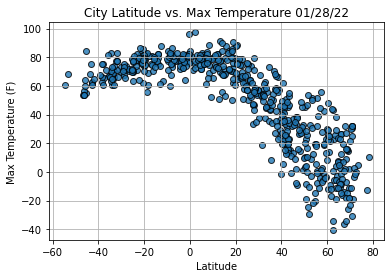

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

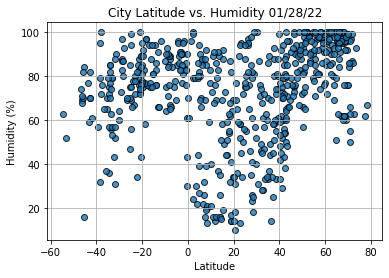

In [30]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

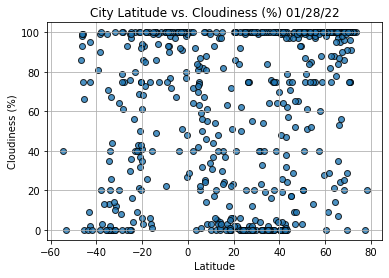

In [31]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

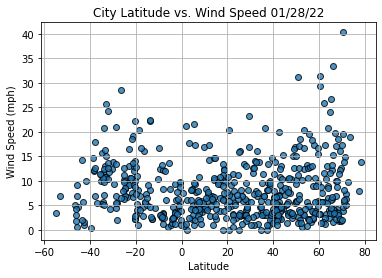

In [32]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()